# 95-865 Spring 2020 Quiz 1

## Note: Different versions of SpaCy can give different results for Problem 2. We are aware of this and graded Problem 2 so that if your code is correct*, so long as your interpretation of results is consistent with what your code outputs, you still got full credit (or partial credit if there was some other error). This affected only a few students.

*We checked for correctness by re-running your code in our compute environment so that the version of SpaCy is consistent with what we produced our solutions with.

**Your name:** Solutions

**Your Andrew ID:** I don't have an Andrew ID =(

Before starting the quiz, please run this next cell first. **Important:** The exam is written so that all the packages that need to be imported are already imported in the next cell.

In [1]:
# ------------------------------------------------------------------------------
# DO NOT MODIFY THIS CELL
#
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import spacy
from collections import Counter
from operator import itemgetter

## Problem 1 - Non-coding questions [45 points]

There are two parts (a) and (b) that can be done in either order as they're unrelated to each other.

**(a) [35 points]** Suppose we are trying to understand what programming languages people use by just scraping code off the web. Let's say that we scrape off a specific database and end up with the following co-occurrence table:

| <i></i> | C++ | Java | Matlab | Python | R |
| ------- |:---:|:----:|:------:|:------:|:-:|
| Alice   | 0   | `a`  | 0      | 0      | 0 |
| Bob     | 0   | 0    | `b`    | 0      | 0 |

Here, `a` is the number of code files that are by Alice and that are in Java, and `b` is the number of code files that are by Bob and that are in Matlab. Assume that the values of `a` and `b` are positive.

Following what we did in lecture, imagine that each code file found is associated with a flashcard that we put into a bag, and we draw a flashcard from the bag (each flashcard in the bag is equally likely to be drawn).

For each of the subparts below, please state your answer in terms of the variables `a` and `b` (unless these do not show up in the answer), and briefly explain how you got your answer. Do not plug in specific numerical values for `a` and `b` in your answers.

**Subpart i. [15 points]** What would the joint probability table be if people and programming languages were independent?

**Your answer and explanation for how you got your answer**:

| <i></i> | C++ | Java         | Matlab       | Python | R |
| ------- |:---:|:------------:|:------------:|:------:|:-:|
| Alice   | 0   | (a/(a+b))^2  | a\*b/(a+b)^2 | 0      | 0 |
| Bob     | 0   | a\*b/(a+b)^2 | (b/(a+b))^2  | 0      | 0 |

Explanation: We first compute the joint probability table:

| <i></i> | C++ | Java    | Matlab  | Python | R |
| ------- |:---:|:-------:|:-------:|:------:|:-:|
| Alice   | 0   | a/(a+b) | 0       | 0      | 0 |
| Bob     | 0   | 0       | b/(a+b) | 0      | 0 |

The marginal probabilities of Alice and Bob are, respectively, a/(a+b) and b/(a+b).

The marginal probabilities of C++, Java, Matlab, Python, and R are, respectively: 0, a/(a+b), b/(a+b), 0, 0.

The joint probability table if people and programming languages were independent is then obtained by multiplying the marginal probabilities, e.g., P(Alice,C++)=P(Alice)P(C++). The final answer is in the top.

**Subpart ii. [5 points]** What is the PMI of Alice and Java? (You do not have to specify the base of the log you use.)

**Your answer and explanation for how you got your answer**: log((a+b)/a)

Explanation: We divide the observed joint probability a/(a+b) by what it would have been if people and companies were independent, namely (a/(a+b))^2. This yields (a+b)/a. We then take the log to get log((a+b)/a).

**Subpart iii. [5 points]** What is the PMI of Bob and Python? (You do not have to specify the base of the log you use.)

**Your answer and explanation for how you got your answer**: undefined

Explanation: Bob and Python never co-occur. Also, Python never occurs. So we get a log(0/0), which is not defined. We also accepted answers of "not a number" or (technically incorrect) -infinity. (In class, we saw log(0/positive number)=-infinity, but if we have log(0/0), it's not -infinity.)

**Subpart iv. [10 points]** What is the chi-square value that checks whether people are independent of programming languages?

**Your answer and explanation for how you got your answer**: a+b

Explanation: Since the co-occurrence relationship is deterministic, this is precisely the case from lecture where the phi-square value is as large as possible:

phi-square = min(num rows, num columns) - 1 = min(2, 5) - 1 = 2 - 1 = 1.

chi-square is the total co-occurrence count (in this case, a+b) multiplied by the phi-square value. The final answer is thus a+b.

Note that we will also accept an answer of undefined/infinity if you simply did a brute-force calculation and tried to divide by the 0 probability entries. In practice, we would ignore the columns where nothing occurs (otherwise, we could easily just add as many columns as we want where nothing occurs, and the joint probability table would still be correct!).

**(b) [10 points]** The plots below are dimensionality reduction results of a real text dataset (i.e., each point in the plots below corresponds to a text document).

![dimensionality-reduction](dimensionality-reduction.png)

The left plot is from using PCA in 2D and the right plot is from using t-SNE in 2D.

**Subpart i. [2 points]** First, as a conceptual question about t-SNE, is t-SNE a clustering algorithm (i.e., does it assign data points to clusters)?

**Your answer (yes/no)**: No

**Subpart ii. [4 points]** Does k-means seem appropriate for clustering the 2D PCA data?

**Your answer with an explanation:** No; the points do not appear to come from a GMM with same-sized perfect circle clusters.

**Subpart iii. [4 points]** Let's now focus on the 2D t-SNE plot. Alice says the perplexity parameter was probably set too low. Why might she say this?

**Your explanation**: When the perplexity parameter is set too low, we can have many little clumps of points that look like little islands. This is what is happening in the plot.

## Problem 2 - Billboard Top 100 Lyrics [55 points]

In this problem, we will try to understand how popular songs differ in 1970 vs 2010. We will consider text data from the Billboard 1964-2015 Top 100 Lyrics dataset. This dataset is stored in the CSV file `lyrics.csv` (which should be in the same folder as this Jupyter notebook) and contains information on 5100 songs. The first line of the data contains the column headers `Rank`, `Song`, `Artist`, `Year` and `Lyrics`. We will disregard the `Rank` and `Artist` columns in this problem.

In [2]:
# ------------------------------------------------------------------------------
# DO NOT MODIFY THIS CELL
#
song_list = []
year_list = []
lyrics_list = []

with open('lyrics.csv', 'r', encoding='utf-8') as f:
    f.readline()  # skip header
    for line in f:
        _, song, _, year, lyrics = line.split(",")
        song_list.append(song)
        year_list.append(int(year))
        lyrics_list.append(lyrics)

There are a number of ways we can examine how songs differ between 1970 and 2010. In this problem, we consider a simple strategy where we look at how the distribution of named entities' labels differ between song lyrics from 1970 and those from 2010. We will draw a bar chart that juxtaposes these two distributions. We will then try to make sense of the bar chart and investigate whether there is some sort of unusual behavior in the data.

**For this problem, please work off the actual named entities and don't work at the token level.** For example, suppose that "the United States" is a named entity with label "GPE". Then we consider this as a single occurrence of the entity label "GPE" and not 3 occurrences (which would be the case if we instead looked at the token level).

**(a) [5 points]** Write code that outputs two Python lists: `lyrics_1970` should consist of song lyrics from `lyrics_list` that come from 1970, and `lyrics_2010` should consist of song lyrics from `lyrics_list` that come from 2010. Recall that the years of songs are stored in the variable `year_list`.

In [3]:
# ------------------------------------------------------------------------------
# YOUR CODE HERE
#
lyrics_1970 = [lyrics for lyrics, year in zip(lyrics_list, year_list) if year == 1970]
lyrics_2010 = [lyrics for lyrics, year in zip(lyrics_list, year_list) if year == 2010]
#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

**(b) [10 points]** Compute the raw count of named entity labels that appears in lyrics from 1970. Repeat this for lyrics from 2010. In both cases, please populate the counters that we have already defined for you below. As a reminder, an example of a named entity label is `GPE`. In how you do the counting, if a named entity label appears in a song n times, please add n to the overall count.

In [4]:
# ------------------------------------------------------------------------------
# DO NOT MODIFY THIS CELL
#
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger'])

In [5]:
named_entity_label_counter_1970 = Counter()  # do not modify this line
named_entity_label_counter_2010 = Counter()  # do not modify this line

for lyrics in lyrics_1970:
    # --------------------------------------------------------------------------
    # YOUR CODE HERE
    #
    for entity in nlp(lyrics).ents:
        named_entity_label_counter_1970[entity.label_] += 1
    #
    # END OF YOUR CODE
    # --------------------------------------------------------------------------

for lyrics in lyrics_2010:
    # --------------------------------------------------------------------------
    # YOUR CODE HERE (hint: the code here should look nearly identical to your
    # code for the first for loop)
    #
    
    for entity in nlp(lyrics).ents:
        named_entity_label_counter_2010[entity.label_] += 1
    #
    # END OF YOUR CODE
    # --------------------------------------------------------------------------

**(c) [10 points]** Let's sort named entity labels in decreasing order of how often they appear in *either* 1970 or 2010. To do this, we first compute the following `Counter` object for you that combines label counts from `named_entity_label_counter_1970` and `named_entity_label_counter_2010`:

In [6]:
# ------------------------------------------------------------------------------
# DO NOT MODIFY THIS CELL
#
named_entity_label_counter_either_1970_or_2010 = named_entity_label_counter_1970 + named_entity_label_counter_2010

Write code that computes the Python list `sorted_named_entity_labels` that consists of named entity labels sorted in decreasing order of how often they appear in the counter `named_entity_label_counter_either_1970_or_2010`. In particular, `sorted_named_entity_labels` should be a Python list consisting of strings (of entity names) and *not* a Python list consisting of tuples.

In [7]:
# ------------------------------------------------------------------------------
# YOUR CODE HERE
#
sorted_tuples = sorted(named_entity_label_counter_either_1970_or_2010.items(),
                       reverse=True, key=itemgetter(1))
sorted_named_entity_labels = [label for label, count in sorted_tuples]
#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

print("\n".join(["Rank %d: %s" % (rank + 1, label)
                 for rank, label in enumerate(sorted_named_entity_labels)]))

Rank 1: PERSON
Rank 2: CARDINAL
Rank 3: DATE
Rank 4: GPE
Rank 5: TIME
Rank 6: ORG
Rank 7: NORP
Rank 8: ORDINAL
Rank 9: QUANTITY
Rank 10: LOC
Rank 11: FAC
Rank 12: PRODUCT
Rank 13: WORK_OF_ART
Rank 14: EVENT


**(d) [5 points]** Write code that computes Python lists of raw counts for how often the sorted named entity labels appear in 1970 and, separately, 2010; these lists should have the counts appear in the same ordering as your labels computed in part **(c)** (see the Python comment in the code cell below). Please make use of the counters you computed in part **(b)**.

In [8]:
# ------------------------------------------------------------------------------
# YOUR CODE HERE
#

# for each of the two lists below, the i-th element should correspond to the
# i-th label in `sorted_named_entity_labels`
raw_counts_1970_for_sorted_named_entity_labels = [named_entity_label_counter_1970[label]
                                                  for label in sorted_named_entity_labels]
raw_counts_2010_for_sorted_named_entity_labels = [named_entity_label_counter_2010[label]
                                                  for label in sorted_named_entity_labels]

#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

If your code in previous parts all works, then the following should produce a bar chart that compares the 1970 and 2010 named entity label distributions.

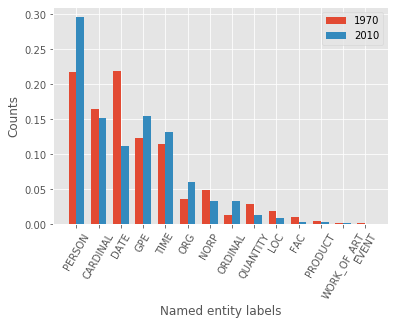

In [9]:
# ------------------------------------------------------------------------------
# DO NOT MODIFY THIS CELL
#
def grouped_bar_chart_with_labels(named_entity_labels, counts_1970, counts_2010):
    fig, ax = plt.subplots()
    width = 0.35
    x = np.arange(len(named_entity_labels))
    ax.bar(x-width/2, counts_1970 / np.sum(counts_1970), width, label='1970')
    ax.bar(x+width/2, counts_2010 / np.sum(counts_2010), width, label='2010')
    ax.set_xticks(np.arange(len(named_entity_labels)))
    ax.set_xticklabels(named_entity_labels, rotation=60)
    ax.set_xlabel('Named entity labels')
    ax.set_ylabel('Counts')
    ax.legend()

grouped_bar_chart_with_labels(sorted_named_entity_labels,
                              raw_counts_1970_for_sorted_named_entity_labels,
                              raw_counts_2010_for_sorted_named_entity_labels)

**(e) [5 points]** What do you notice about how often the named entity label `PERSON` appears in 1970 vs 2010? What about `DATE`?

**Your answer here (no code):** It appears that entity label `PERSON` appears less frequently in 1970 compared to 2010. Meanwhile, `DATE` appears more frequently in 1970 compared to 2010.

**(f) [10 points]** At this point, we examine *why* we might be getting the results from parts **(d)** and **(e)**; it is good to be suspicious as to whether there really is a change in distribution of the named entity labels and, if so, what explains the change.

For simplicity, let's focus on the `DATE` entity label to see what might be happening in popular songs in 1970. Write code that populates the `Counter` object below with counts of how often different named entities with label `DATE` appear in popular song lyrics in 1970.

In [10]:
entity_that_is_a_date_counter_1970 = Counter()  # do not modify this line

# ------------------------------------------------------------------------------
# YOUR CODE HERE
#
for lyrics in lyrics_1970:
    # --------------------------------------------------------------------------
    # Hint: the string representation of a named entity stored in the variable
    # `entity` can be obtained via `entity.orth_`
    #
    for entity in nlp(lyrics).ents:
        if entity.label_ == 'DATE':
            entity_that_is_a_date_counter_1970[entity.orth_] += 1
#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

# display the top 10 entries in the counter
entity_that_is_a_date_counter_1970.most_common()

[('saturday', 23),
 ('some day', 14),
 ('today', 10),
 ('tomorrow', 10),
 ('the day', 8),
 ('winters day', 4),
 ('years', 3),
 ('billion year old', 3),
 ('these days', 2),
 ('cryin', 2),
 ('1970', 2),
 ('daily', 2),
 ('day', 2),
 ('any day', 2),
 ('yesterday', 2),
 ('summer', 2),
 ('the lonely days', 2),
 ('days', 2),
 ('winters', 1),
 ('some day some day', 1),
 ('the week of august 15 1970', 1),
 ('13 weeks', 1),
 ('the week of september 19', 1),
 ('september', 1),
 ('one day', 1),
 ('up to youtwo days later', 1),
 ('the age of 13', 1),
 ('a long long time ago', 1),
 ('that day', 1),
 ('ajust', 1),
 ('just a week', 1),
 ('a day', 1),
 ('no more lonely days', 1),
 ('a crystal day', 1),
 ('a sunny day', 1),
 ('70s', 1),
 ('brighter days', 1),
 ('saturdays', 1),
 ('a new day', 1),
 ('the time of year', 1)]

You should find that the top `DATE` entity has an unusually high count that is greater than 20. What is this named entity?

**Your answer here (no code):** saturday

**(g) [10 points]** At this point, it's unclear whether the top `DATE` entity found in part **(f)** shows up in many songs in 1970 or just 1 song. The issue is that we didn't also keep track of songs! Write code that counts the number of times named entities that have entity label `DATE` appear in 1970 song lyrics, where we also keep track of what song the named entity came from. Specifically, the keys of the counter are of the form (song, entity used in song that has entity label `DATE`). In particular, when you do a `for` loop through the named entities, if the entity is a date, then you increment the count for the pair (song, entity's string representation).

In [11]:
song_date_counter_1970 = Counter()  # do not modify this line

# ------------------------------------------------------------------------------
# YOUR CODE HERE
#
songs_1970 = [song for song, year in zip(song_list, year_list) if year == 1970]

for song, lyrics in zip(songs_1970, lyrics_1970):
    for entity in nlp(lyrics).ents:
        if entity.label_ == 'DATE':
            song_date_counter_1970[(song, entity.orth_)] += 1

#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

# display the top 10 entries in the counter
song_date_counter_1970.most_common()[:10]

[(('come saturday morning', 'saturday'), 23),
 (('ooh child', 'some day'), 8),
 (('everything is beautiful', 'winters day'), 4),
 (('ball of confusion thats what the world is today', 'today'), 4),
 (('its only make believe', 'some day'), 4),
 (('woodstock', 'billion year old'), 3),
 (('they long to be close to you', 'the day'), 2),
 (('the love you save', 'some day'), 2),
 (('cracklin rosie', 'these days'), 2),
 (('lookin out my back door', 'tomorrow'), 2)]

It appears that all the 20+ counts of the `DATE` named entity from part **(f)** is from the same song. What is the name of this song?

**Your answer here (no code):** come saturday morning

**Fun fact:** We did not actually investigate the `PERSON` entity label in more detail. We will spare you the coding effort and tell you that if you do check what the named entities are that have label `PERSON`, it turns out that SpaCy does a *terrible* job with many phrases that are not people's names being considered as `PERSON`, so any differences in changes of mentions of `PERSON` between popular song lyrics in 1970 and in 2010 are a bit suspect.